## Using Enron Financial and Email data to Identify Fraud by Machine Learning 

[![N|Solid](https://cldup.com/dTxpPi9lDf.thumb.png)](https://nodesource.com/products/nsolid)

Yang Wang
12.23.2016  Merry Christmas! 


### 1.Project Description
Enron group scandal is the largest corporate fraud in American history. After a widespread Federal investigation, a significant amount of typically confidential information entered into the public record, including tens of thousands of emails and detailed financial data for top executives. In this project, I investigate a publized Enron data set including both finical and Email record about 150 employees at Enron group. Several board members and management tiers involved in illegal business fraud were eventually charged. Some of these people were found guilty and sent to the jail. Some of people were settled out side of court. Those main characters entangled with fraud are people of interest, also tagged with 'poi' in the data set. The scheme of this project is to develop predcitve models on identification of people of interest by incorprating the financial and email communication information of employees. Machine Learning techniques are suitable for this supervised learning problem due to its powerful capability to make prediction by learning existed information. The goal of final model is to have a power of more than 0.3 on both recall and precision metrics. First, I investigate the data set and perform explortary data analysis to detect possible outliers and as a first attempt to feature selection. Then, I narrow down all the features with less missing values into 5 features by using  [SelectKbest](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html) algorithm and Decision Tree. After that, I implement Naive Bayes, Decision Tree, Knearest Neighbours, and Support Vector Machine algorithms and tune  corresponding hyper-parameters with [GridSearch](http://scikit-learn.org/stable/modules/grid_search.html). Through the end of model selection and validation, I finalize the Decision Tress model with ........


In [5]:
pwd

u'C:\\Users\\lavender\\Desktop\\Udacity_Github\\Data Analyst Nanodegree\\P5 Identify Fraud from Enron Email\\final_project'

1. Summarize for us the goal of this project and how machine learning is useful in trying to accomplish it. As part of your answer, give some background on the dataset and how it can be used to answer the project question. Were there any outliers in the data when you got it, and how did you handle those?  [relevant rubric items: “data exploration”, “outlier investigation”]

In [6]:
import numpy as np
import pickle
import sys
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline  
sys.path.append("../tools/")

In [4]:
import os
os.chdir('final_project')

WindowsError: [Error 2] The system cannot find the file specified: 'final_project'

In [8]:
# import data
data_dict = pickle.load( open("final_project_dataset.pkl", "r") )
Enron_data = pd.DataFrame(data_dict).transpose()

In [45]:
# examine number of sample and features in the dataset
e = Enron_data
all_feature_list = e.columns
financial_features = ['salary', 'deferral_payments', 'total_payments',
                      'loan_advances', 'bonus', 'restricted_stock_deferred',
                      'deferred_income', 'total_stock_value', 'expenses',
                      'exercised_stock_options', 'other', 'long_term_incentive',
                      'restricted_stock', 'director_fees']
email_features =  ['to_messages', 'email_address', 'from_poi_to_this_person',
                    'from_messages', 'from_this_person_to_poi',
                    'shared_receipt_with_poi']
print "total number of sample: ", len(e)
print "total feature number: %d\n%r\n " %(len(all_feature_list), all_feature_list)
print "financial features number: %d\n%r\n" %(len(financial_features), financial_features)
print "email features number: %d\n%r\n" %(len(email_features), email_features)

total number of sample:  146
total feature number: 21
Index([u'bonus', u'deferral_payments', u'deferred_income', u'director_fees',
       u'email_address', u'exercised_stock_options', u'expenses',
       u'from_messages', u'from_poi_to_this_person',
       u'from_this_person_to_poi', u'loan_advances', u'long_term_incentive',
       u'other', u'poi', u'restricted_stock', u'restricted_stock_deferred',
       u'salary', u'shared_receipt_with_poi', u'to_messages',
       u'total_payments', u'total_stock_value'],
      dtype='object')
 
financial features number: 14
['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees']

email features number: 6
['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi']



poi                            0
total_stock_value             20
total_payments                21
email_address                 35
restricted_stock              36
exercised_stock_options       44
salary                        51
expenses                      51
other                         53
to_messages                   60
shared_receipt_with_poi       60
from_messages                 60
from_poi_to_this_person       60
from_this_person_to_poi       60
bonus                         64
long_term_incentive           80
deferred_income               97
deferral_payments            107
restricted_stock_deferred    128
director_fees                129
loan_advances                142
dtype: int64


C:\Users\lavender\Anaconda2\envs\udacity\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: order is deprecated, use sort_values(...)
  app.launch_new_instance()


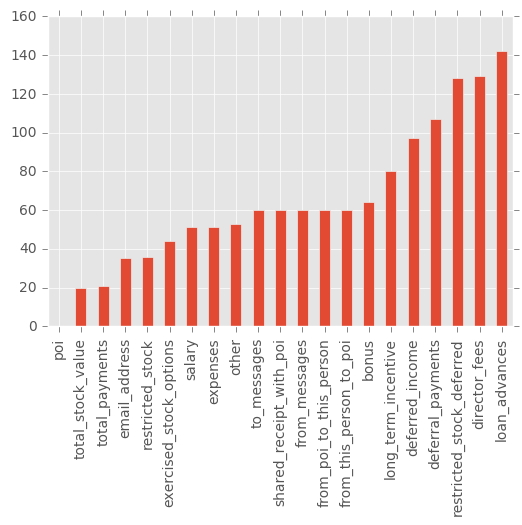

In [46]:
# Number of NaN for each feature
e[e == 'NaN'] = np.nan
na_num = e.isnull().sum().order()
print na_num
na_num.plot(kind = 'bar')


In [47]:
e = e.drop("TOTAL")
#e.loc['TOTAL']

In [48]:
e.poi.value_counts()#.plot(kind = 'bar', width=0.35)

False    127
True      18
Name: poi, dtype: int64

In [49]:
# number of NA less than 70
my_feature = na_num[na_num<70]

my_feature = list(my_feature.index)
print my_feature

['poi', 'total_stock_value', 'total_payments', 'email_address', 'restricted_stock', 'exercised_stock_options', 'salary', 'expenses', 'other', 'to_messages', 'shared_receipt_with_poi', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'bonus']


In [50]:
aban_feature = na_num[na_num>70]
aban_feature = list(aban_feature.index)


In [51]:
aban_feature + ['poi']

['long_term_incentive',
 'deferred_income',
 'deferral_payments',
 'restricted_stock_deferred',
 'director_fees',
 'loan_advances',
 'poi']

In [52]:
false_ratio = e[aban_feature + ['poi']].groupby('poi').count().iloc[0,:]/128
false_ratio

long_term_incentive          0.414062
deferred_income              0.289062
deferral_payments            0.257812
restricted_stock_deferred    0.132812
director_fees                0.125000
loan_advances                0.015625
dtype: float64

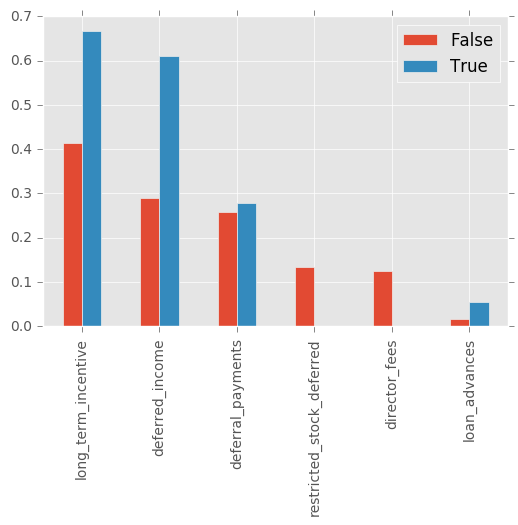

In [53]:
 
false_ratio = e[aban_feature + ['poi']].groupby('poi').count().iloc[0,:]/128
true_ratio = e[aban_feature + ['poi']].groupby('poi').count().iloc[1,:]/18
ratio_df = pd.DataFrame({'False':false_ratio, 'True':true_ratio})

ratio_df.plot(kind='bar')

In [54]:
ratio_df

,False,True
long_term_incentive,0.414062,0.666667
deferred_income,0.289062,0.611111
deferral_payments,0.257812,0.277778
restricted_stock_deferred,0.132812,0.000000
director_fees,0.125000,0.000000
loan_advances,0.015625,0.055556


In [431]:
e = Enron_data


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [56]:
e.columns
e[[feature ,'poi']].dropna(0)

NameError: name 'feature' is not defined

In [22]:
e[e == 'NaN'] = np.nan
e.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


C:\Users\lavender\Anaconda2\envs\udacity\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


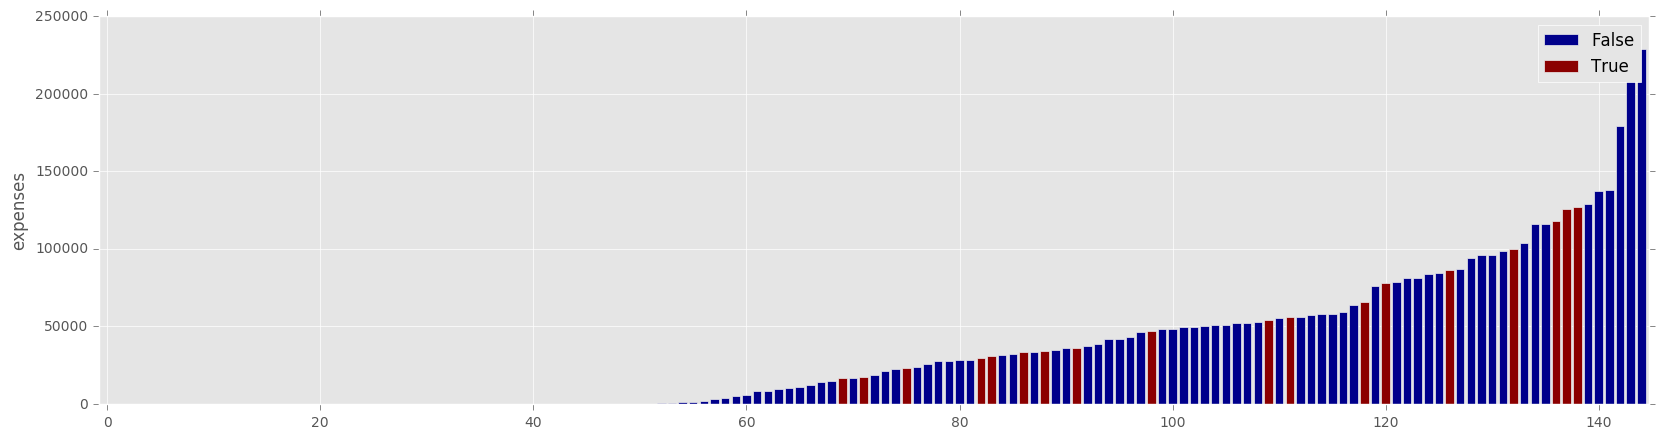

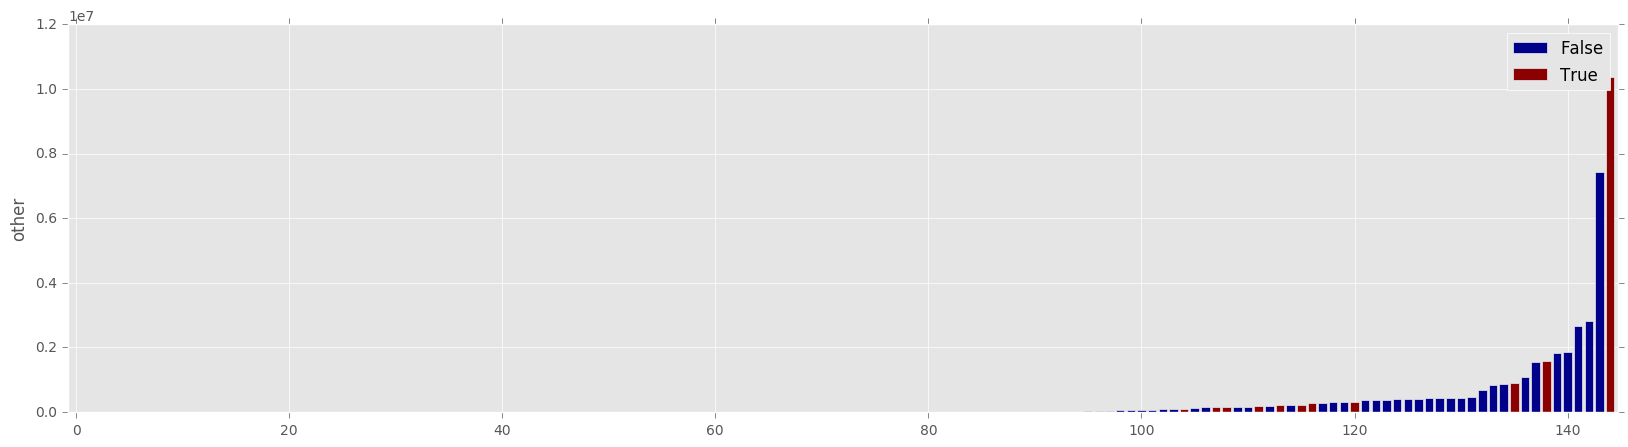

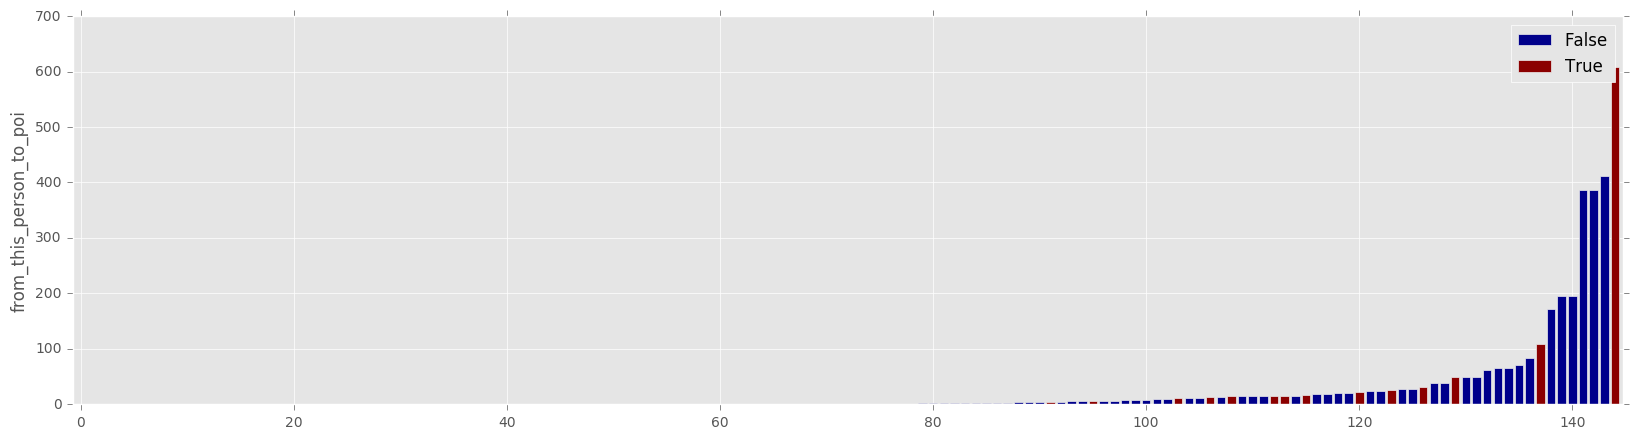

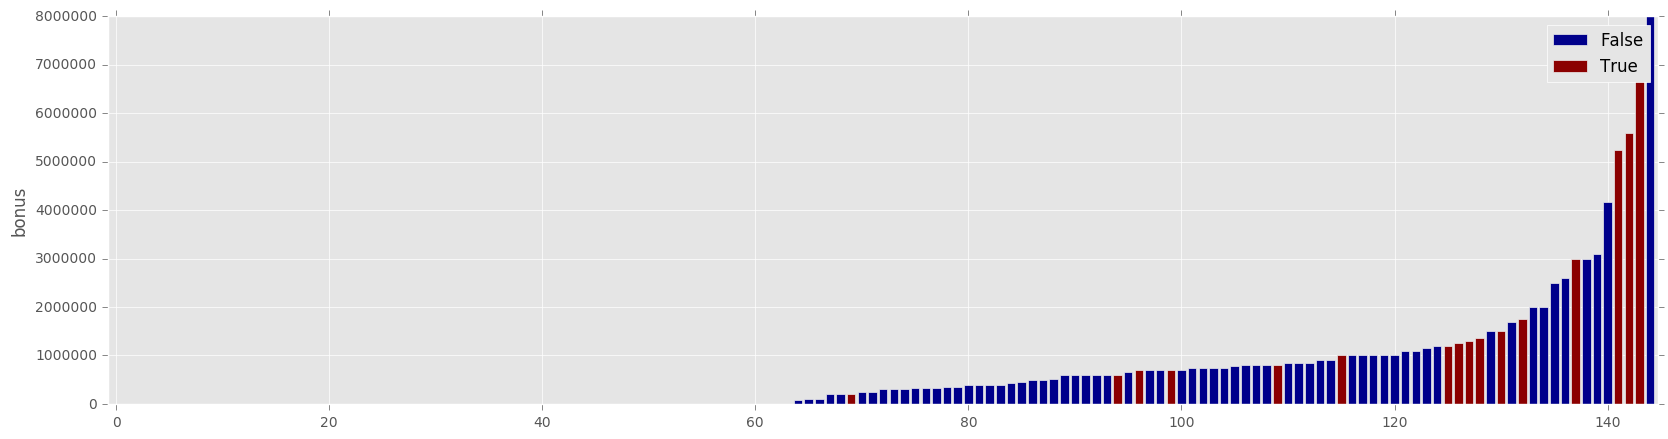

In [96]:

selected_feature = ['expenses', 'other', 'from_this_person_to_poi', 'bonus']
for feature in selected_feature:
    plt_bar = e[[feature ,'poi']].dropna().sort(feature).reset_index()
    fig, ax = plt.subplots(figsize=(20,5))
    false_data = plt_bar[plt_bar.poi == False][feature]
    true_data = plt_bar[plt_bar.poi == True][feature]
    ax.bar(false_data.index,false_data, label='False',color='DarkBlue',align='center')
    ax.bar(true_data.index,true_data, label='True',color="DarkRed",align='center')
    #true_data.plot(kind='bar',label='False',color="DarkGreen")
    
    ax.set_xlim(left=plt_bar.index[0]-0.75,right=plt_bar.index[-1]+0.75)
    ax.set_ylabel(feature)
    ax.legend()

In [393]:
df = pd.DataFrame(np.random.uniform(size=37)*100, columns=['A'])
good = df['A'][df.A>75]
good

0     82.010365
1     93.298643
2     98.596213
3     95.089354
6     89.432035
9     87.260211
14    92.587726
15    98.195744
23    92.350449
28    91.852032
30    91.280192
36    99.093827
Name: A, dtype: float64

From the ratio plot above, we can see most of features are having missing values in labels coloum('poi') except 'long_term_incentive' and 'deferred_income'. So these two features will be further examined to be added into desired feature list for the machine learning model.

After I check the explanation for these two features in enron61702insiderpay.pdf, it seems both two features are not possible to be good indicators for 'poi'. Because these two features represent the money that cannot be cashed out in short period of time, it does not make too much sense for a fraud exercise to have much future income. However, our dataset is pretty unbalanced, more True labels than False labels, and these two features have more than 60% information when they comes to true label data. So, if our first desired feature list is not performing well, we may want to add these two features later. 


In [59]:
my_feature_e = e[my_feature].drop('TOTAL')


ValueError: labels ['TOTAL'] not contained in axis

In [60]:
# remove some features
my_feature.remove('email_address')


In [61]:
my_feature


['poi',
 'total_stock_value',
 'total_payments',
 'restricted_stock',
 'exercised_stock_options',
 'salary',
 'expenses',
 'other',
 'to_messages',
 'shared_receipt_with_poi',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'bonus']

In [36]:
my_feature

['poi',
 'total_stock_value',
 'total_payments',
 'email_address',
 'restricted_stock',
 'exercised_stock_options',
 'salary',
 'expenses',
 'other',
 'to_messages',
 'shared_receipt_with_poi',
 'from_messages',
 'from_poi_to_this_person',
 'from_this_person_to_poi',
 'bonus']

In [105]:
selected_e = e[['poi'] + selected_feature]

In [106]:
selected_e.head()

,poi,expenses,other,from_this_person_to_poi,bonus
ALLEN PHILLIP K,False,13868,152,65,4175000
BADUM JAMES P,False,3486,0,0,0
BANNANTINE JAMES M,False,56301,864523,0,0
BAXTER JOHN C,False,11200,2660303,0,1200000
BAY FRANKLIN R,False,129142,69,0,400000


In [107]:
import numpy as np
selected_e=selected_e.fillna(0)

In [108]:
np.log(e.bonus)

ALLEN PHILLIP K                  15.244625
BADUM JAMES P                         -inf
BANNANTINE JAMES M                    -inf
BAXTER JOHN C                    13.997832
BAY FRANKLIN R                   12.899220
BAZELIDES PHILIP J                    -inf
BECK SALLY W                     13.458836
BELDEN TIMOTHY N                 15.473738
BELFER ROBERT                         -inf
BERBERIAN DAVID                       -inf
BERGSIEKER RICHARD P             12.429216
BHATNAGAR SANJAY                      -inf
BIBI PHILIPPE A                  13.815511
BLACHMAN JEREMY M                13.652992
BLAKE JR. NORMAN P                    -inf
BOWEN JR RAYMOND M               14.115615
BROWN MICHAEL                         -inf
BUCHANAN HAROLD G                13.122363
BUTTS ROBERT H                   13.527828
BUY RICHARD B                    13.710150
CALGER CHRISTOPHER F             14.038654
CARTER REBECCA C                 12.611538
CAUSEY RICHARD A                 13.815511
CHAN RONNIE

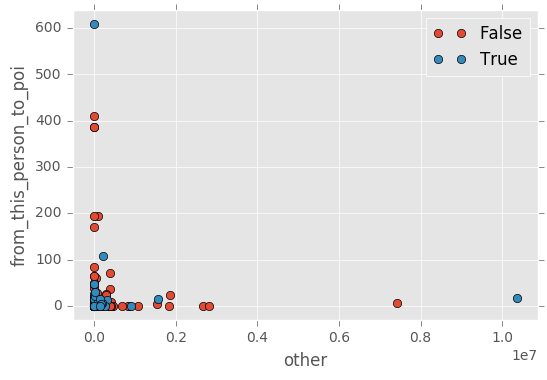

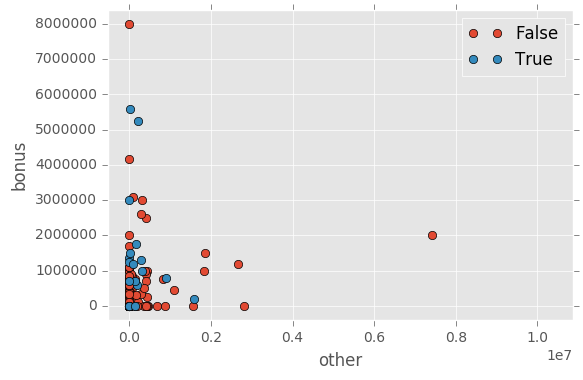

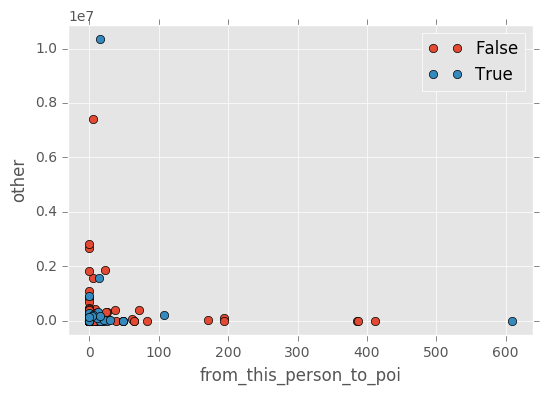

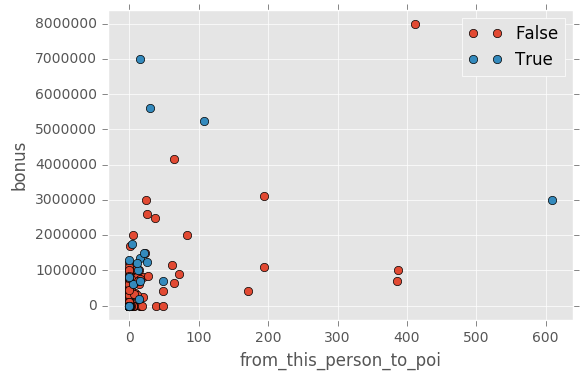

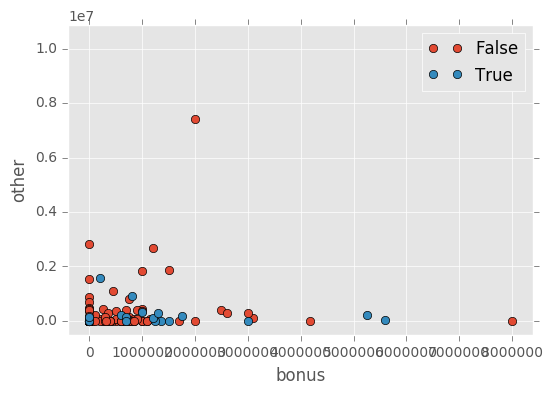

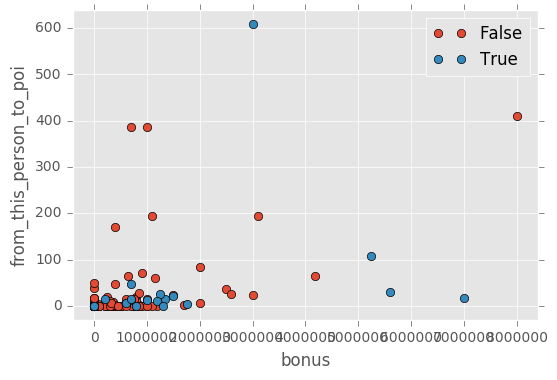

In [109]:
# scatterplot for features group by 'poi
groups = selected_e.groupby('poi')
for x in selected_feature[1:]:
    for y in selected_feature[1:]:
        if y == x:
            continue     
        fig, ax = plt.subplots()
        ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
        for name, group in groups:
            ax.plot(group[x], group[y], marker='o', linestyle='', label=name)
            plt.xlabel(x)
            plt.ylabel(y)
        ax.legend()
        plt.show()


2.3025850929940459

In [110]:
# detect outlier
selected_e=selected_e.drop('BANNANTINE JAMES M')
selected_e[np.log(selected_e.salary) < 7]

AttributeError: 'DataFrame' object has no attribute 'salary'

In [112]:
selected_e

,poi,expenses,other,from_this_person_to_poi,bonus
ALLEN PHILLIP K,False,13868,152,65,4175000
BADUM JAMES P,False,3486,0,0,0
BAXTER JOHN C,False,11200,2660303,0,1200000
BAY FRANKLIN R,False,129142,69,0,400000
BAZELIDES PHILIP J,False,0,874,0,0
BECK SALLY W,False,37172,566,386,700000
BELDEN TIMOTHY N,True,17355,210698,108,5249999
BELFER ROBERT,False,0,0,0,0
BERBERIAN DAVID,False,11892,0,0,0
BERGSIEKER RICHARD P,False,59175,427316,0,250000


In [127]:
print np.log(selected_e.iloc[:, 1:]).to_string()

                                expenses      other  from_this_person_to_poi      bonus
ALLEN PHILLIP K                 9.537339   5.023881                 4.174387  15.244625
BADUM JAMES P                   8.156510       -inf                     -inf       -inf
BAXTER JOHN C                   9.323669  14.793951                     -inf  13.997832
BAY FRANKLIN R                 11.768668   4.234107                     -inf  12.899220
BAZELIDES PHILIP J                  -inf   6.773080                     -inf       -inf
BECK SALLY W                   10.523311   6.338594                 5.955837  13.458836
BELDEN TIMOTHY N                9.761636  12.258181                 4.682131  15.473738
BELFER ROBERT                       -inf       -inf                     -inf       -inf
BERBERIAN DAVID                 9.383621       -inf                     -inf       -inf
BERGSIEKER RICHARD P           10.988254  12.965279                     -inf  12.429216
BHATNAGAR SANJAY                

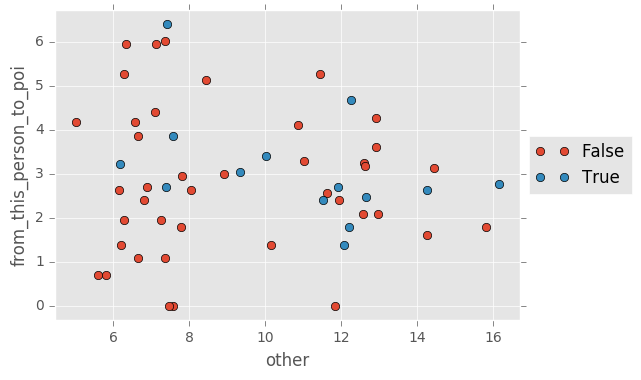

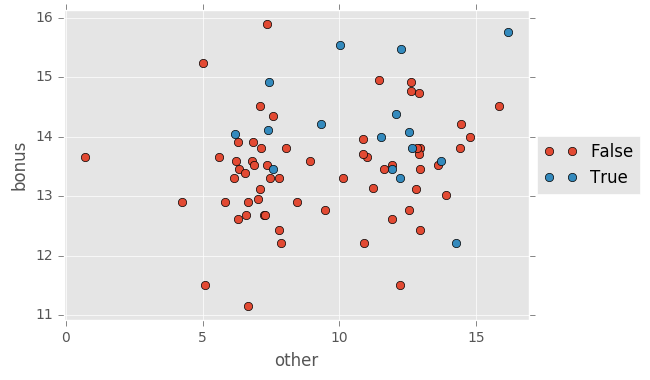

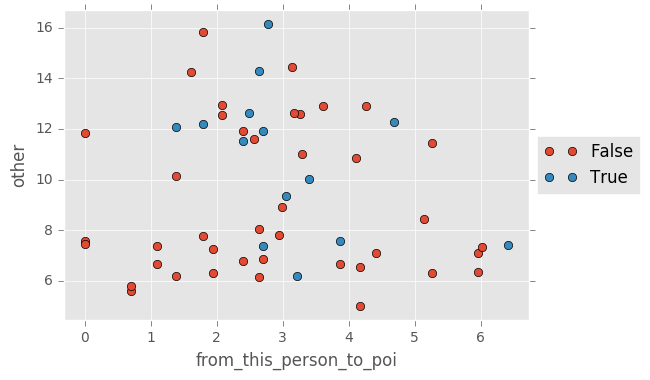

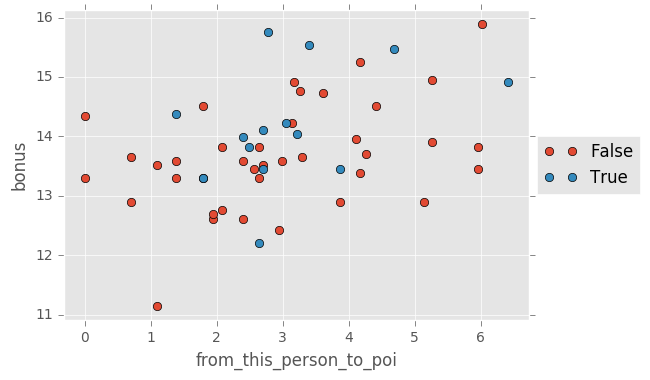

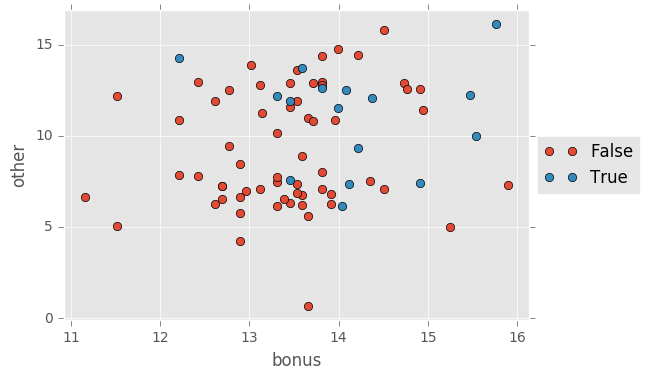

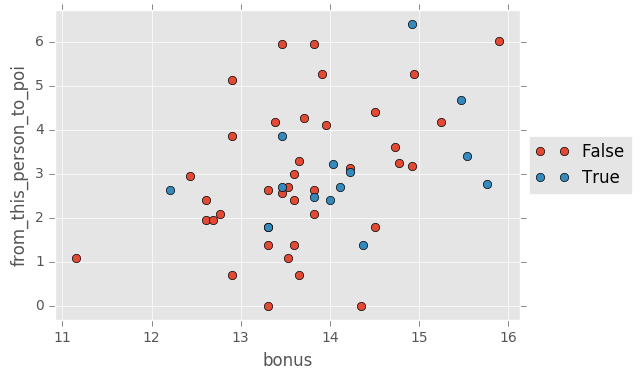

In [111]:
# scatterplot for features group by 'poi
groups = selected_e.groupby('poi')
for x in selected_feature[1:]:
    for y in selected_feature[1:]:
        if y == x:
            continue     
        fig, ax = plt.subplots()
        ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
        for name, group in groups:
            ax.plot(np.log(group[x]), np.log(group[y]), marker='o', linestyle='', label=name)
            plt.xlabel(x)
            plt.ylabel(y)
        ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.show()


In [140]:
pwd

u'C:\\Users\\lavender\\Desktop\\Udacity\\ud120-projects'

In [134]:
selected_e.poi

ALLEN PHILLIP K                  False
BADUM JAMES P                    False
BAXTER JOHN C                    False
BAY FRANKLIN R                   False
BAZELIDES PHILIP J               False
BECK SALLY W                     False
BELDEN TIMOTHY N                  True
BELFER ROBERT                    False
BERBERIAN DAVID                  False
BERGSIEKER RICHARD P             False
BHATNAGAR SANJAY                 False
BIBI PHILIPPE A                  False
BLACHMAN JEREMY M                False
BLAKE JR. NORMAN P               False
BOWEN JR RAYMOND M                True
BROWN MICHAEL                    False
BUCHANAN HAROLD G                False
BUTTS ROBERT H                   False
BUY RICHARD B                    False
CALGER CHRISTOPHER F              True
CARTER REBECCA C                 False
CAUSEY RICHARD A                  True
CHAN RONNIE                      False
CHRISTODOULOU DIOMEDES           False
CLINE KENNETH W                  False
COLWELL WESLEY           

In [125]:
# check other possible outliers
e_plot[(e_plot.salary > 6e6) | (e_plot.bonus > 0.4e7)]
# they are valid, no need to get away

,bonus,salary,poi
ALLEN PHILLIP K,4175000,201955,False
BELDEN TIMOTHY N,5249999,213999,True
LAVORATO JOHN J,8000000,339288,False
LAY KENNETH L,7000000,1072321,True
SKILLING JEFFREY K,5600000,1111258,True


In [11]:
array

array([[ 2.],
       [ 3.],
       [ 5.]])

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()

In [14]:
scaler.fit(array)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [15]:
scaled_array=scaler.fit_transform(array)

In [16]:
array

array([[ 2.],
       [ 3.],
       [ 5.]])

In [17]:
scaled_array

array([[ 0.        ],
       [ 0.33333333],
       [ 1.        ]])

In [18]:
scaler.data_min_

array([ 2.])

In [19]:
scaler.transform(np.array([5.]))

C:\Users\lavender\Anaconda2\envs\udacity\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


array([ 1.])

In [ ]:
1e5

In [ ]:
2e6q

In [132]:
e[e.poi==True][selected_feature]

,expenses,other,from_this_person_to_poi,bonus
BELDEN TIMOTHY N,17355,210698,108,5249999
BOWEN JR RAYMOND M,65907,1621,15,1350000
CALGER CHRISTOPHER F,35818,486,25,1250000
CAUSEY RICHARD A,30674,307895,12,1000000
COLWELL WESLEY,16514,101740,11,1200000
DELAINEY DAVID W,86174,1661,609,3000000
FASTOW ANDREW S,55921,277464,0,1300000
GLISAN JR BEN F,125978,200308,6,600000
HANNON KEVIN P,34039,11350,21,1500000
HIRKO JOSEPH,77978,2856,0,0


In [20]:
financial_features = ['salary', 'deferral_payments', 'total_payments', 
                      'loan_advances', 'bonus', 'restricted_stock_deferred', 
                      'deferred_income', 'total_stock_value', 'expenses', 
                      'exercised_stock_options', 'other', 'long_term_incentive', 
                      'restricted_stock', 'director_fees'] 
email_features =  ['to_messages', 'email_address', 'from_poi_to_this_person',
                    'from_messages', 'from_this_person_to_poi',
                    'shared_receipt_with_poi']

In [21]:
e[email_features]

,to_messages,email_address,from_poi_to_this_person,from_messages,from_this_person_to_poi,shared_receipt_with_poi
ALLEN PHILLIP K,2902,phillip.allen@enron.com,47,2195,65,1407
BADUM JAMES P,NaN,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,566,james.bannantine@enron.com,39,29,0,465
BAXTER JOHN C,NaN,NaN,NaN,NaN,NaN,NaN
BAY FRANKLIN R,NaN,frank.bay@enron.com,NaN,NaN,NaN,NaN
BAZELIDES PHILIP J,NaN,NaN,NaN,NaN,NaN,NaN
BECK SALLY W,7315,sally.beck@enron.com,144,4343,386,2639
BELDEN TIMOTHY N,7991,tim.belden@enron.com,228,484,108,5521
BELFER ROBERT,NaN,NaN,NaN,NaN,NaN,NaN
BERBERIAN DAVID,NaN,david.berberian@enron.com,NaN,NaN,NaN,NaN


In [38]:
#length of data set
len(e)

145

AttributeError: 'DataFrame' object has no attribute 'dropNA'

In [40]:
e.head()

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [49]:
e

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014


In [176]:
# Number of NaN for each feature
print 'number of sample in dataset: ',len(e)
e[e == 'NaN'] = np.nan
na_num = e.isnull().sum().order()
na_num.plot()

number of sample in dataset:  145


C:\Users\lavender\Anaconda2\envs\udacity\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: order is deprecated, use sort_values(...)


In [164]:
e

,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000,2869717,-3081055,NaN,phillip.allen@enron.com,1729541,13868,2195,47,65,...,304805,152,False,126027,-126027,201955,1407,2902,4484442,1729541
BADUM JAMES P,NaN,178980,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,...,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,182466,257817
BANNANTINE JAMES M,NaN,NaN,-5104,NaN,james.bannantine@enron.com,4046157,56301,29,39,0,...,NaN,864523,False,1757552,-560222,477,465,566,916197,5243487
BAXTER JOHN C,1200000,1295738,-1386055,NaN,NaN,6680544,11200,NaN,NaN,NaN,...,1586055,2660303,False,3942714,NaN,267102,NaN,NaN,5634343,10623258
BAY FRANKLIN R,400000,260455,-201641,NaN,frank.bay@enron.com,NaN,129142,NaN,NaN,NaN,...,NaN,69,False,145796,-82782,239671,NaN,NaN,827696,63014
BAZELIDES PHILIP J,NaN,684694,NaN,NaN,NaN,1599641,NaN,NaN,NaN,NaN,...,93750,874,False,NaN,NaN,80818,NaN,NaN,860136,1599641
BECK SALLY W,700000,NaN,NaN,NaN,sally.beck@enron.com,NaN,37172,4343,144,386,...,NaN,566,False,126027,NaN,231330,2639,7315,969068,126027
BELDEN TIMOTHY N,5249999,2144013,-2334434,NaN,tim.belden@enron.com,953136,17355,484,228,108,...,NaN,210698,True,157569,NaN,213999,5521,7991,5501630,1110705
BELFER ROBERT,NaN,-102500,NaN,3285,NaN,3285,NaN,NaN,NaN,NaN,...,NaN,NaN,False,NaN,44093,NaN,NaN,NaN,102500,-44093
BERBERIAN DAVID,NaN,NaN,NaN,NaN,david.berberian@enron.com,1624396,11892,NaN,NaN,NaN,...,NaN,NaN,False,869220,NaN,216582,NaN,NaN,228474,2493616


In [167]:
 e.plot('salary')

In [201]:
4.41096000e+05

441096.0

In [202]:
lista = [2,4,5,6]


In [203]:
lista.remove(2)

In [204]:
lista

[4, 5, 6]

In [205]:
[1] + lista

[1, 4, 5, 6]

In [206]:
lista

[4, 5, 6]

In [207]:
print range(4)

[0, 1, 2, 3]


In [208]:
lista

[4, 5, 6]

In [209]:
lista[1:]

[5, 6]

In [211]:
lista.index(4)

0

In [237]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [225]:
iris = load_iris()

In [227]:
X, y = iris.data, iris.target

In [280]:
pca = PCA(n_components=2)
selection = SelectKBest(k=1)
combined_features = FeatureUnion([('pca',pca), ('uni_select',selection)])

#X_features = combined_features.fit(X, y).transform(X)
svm = SVC(kernel='linear')
pipeline = Pipeline([('features', combined_features),
                     ('svm', svm)])
param_grid = dict(features__pca__n_components=[1,2,3],
                  features__uni_select__k=[1,2],
                  svm__C=[0.1,1,10])
grid_search = GridSearchCV(pipeline, param_grid=param_grid)
grid_search.fit(X,y)
print (grid_search.best_estimator_)
print (grid_search.best_score_)
result = pd.DataFrame(grid_search.cv_results_)
print result


Pipeline(steps=[('features', FeatureUnion(n_jobs=1,
       transformer_list=[('pca', PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)), ('uni_select', SelectKBest(k=2, score_func=<function f_classif at 0x0000000010FC4F28>))],
       transfor...,
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))])
0.98
    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.008000         0.004000         0.946667          0.940285   
1        0.007667         0.003333         0.946667          0.947019   
2        0.006000         0.003333         0.953333          0.946821   
3        0.007000         0.004000         0.953333          0.946920   
4        0.007000         0.003667         0.960000          0.966924   
5        0.006000         0.003667         0.960000          0.966825   
6        0.007000         0.003667         0.946667          0.953456 

In [243]:
pipeline.named_steps.keys()

['selectkbest', 'pca']

In [281]:
pwd

u'C:\\Users\\lavender\\Desktop\\Udacity\\ud120-projects'

In [286]:
import os
os.chdir('C:\\Users\\lavender\\Desktop\\Udacity\\ud120-projects\\final_project')

In [287]:
pwd

u'C:\\Users\\lavender\\Desktop\\Udacity\\ud120-projects\\final_project'

In [289]:
sys.path.append("../tools/")

In [291]:
%run poi_id.py

ImportError: No module named feature_format

In [131]:
15000 / 36


416

In [132]:
param_grid = dict(pca__n_components=[2,3],
                  svm__C=[0.1,1,5])

In [133]:
param_grid

{'pca__n_components': [2, 3], 'svm__C': [0.1, 1, 5]}

In [140]:
e.loc['TOTAL']

bonus                         97343619
deferral_payments             32083396
deferred_income              -27992891
director_fees                  1398517
email_address                      NaN
exercised_stock_options      311764000
expenses                       5235198
from_messages                      NaN
from_poi_to_this_person            NaN
from_this_person_to_poi            NaN
loan_advances                 83925000
long_term_incentive           48521928
other                         42667589
poi                              False
restricted_stock             130322299
restricted_stock_deferred     -7576788
salary                        26704229
shared_receipt_with_poi            NaN
to_messages                        NaN
total_payments               309886585
total_stock_value            434509511
Name: TOTAL, dtype: object

In [152]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
import sys
import pickle
sys.path.append("../tools/")
import numpy as np
import pandas as pd
from feature_format import featureFormat, targetFeatureSplit
from sklearn.pipeline import Pipeline, FeatureUnion
#from tester import dump_classifier_and_data
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.svm import SVC

### Task 1: Select what features you'll use.
### features_list is a list of strings, each of which is a feature name.
### The first feature must be "poi".
features_list = ['poi','salary'] # You will need to use more features

### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)


financial_features = ['salary', 'deferral_payments', 'total_payments',
                      'loan_advances', 'bonus', 'restricted_stock_deferred',
                      'deferred_income', 'total_stock_value', 'expenses',
                      'exercised_stock_options', 'other', 'long_term_incentive',
                      'restricted_stock', 'director_fees']
email_features =  ['to_messages', 'from_poi_to_this_person',
                    'from_messages', 'from_this_person_to_poi',
                    'shared_receipt_with_poi']

all_features = financial_features + email_features


### Task 2: Remove outliers
data_dict.pop('TOTAL')
data_dict.pop('BELFER ROBERT')
data_dict.pop('BANNANTINE JAMES M')

### Task 3: Create new feature(s)
### select the features are numerical and have less NA(less than 70)
my_feature = ['poi', 'total_stock_value',
              'salary', 'expenses',
              'other', 'to_messages', 'shared_receipt_with_poi', 'from_messages',
              'from_poi_to_this_person', 'from_this_person_to_poi', 'bonus']

### Store to my_dataset for easy export below.
my_dataset = data_dict

### Extract features and labels from dataset for local testing

data = featureFormat(my_dataset, my_feature, sort_keys = True)
labels, features = targetFeatureSplit(data)
# transform train data to logarithmic
for entry in features:
    for e in range(len(entry)):
        if entry[e] !=0:
            entry[e] = np.log(entry[e])

# feature scale first
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scale_features = scaler.fit_transform(features)


#use SelectPercentile to improve feature selection
from sklearn.feature_selection import SelectPercentile, f_classif
selector = SelectPercentile(f_classif, percentile=50)
selector.fit(scale_features, labels)
SP_features = []
for e in range(len(selector.get_support())):
    if  selector.get_support()[e] == True:
        SP_features.append(my_feature[1:][e])
print "SelectPercentile features: ", SP_features



#updated myfeature
def get_data(features_list, full_data):
    data = featureFormat(full_data, features_list, sort_keys = True)
    labels, features = targetFeatureSplit(data)

    #features = np.log(features)

    #scaler = MinMaxScaler()
    #scale_features = scaler.fit_transform(features)
    return features, labels

### Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

'''
Decision Tree and Knearnest neighour will be used in this project. Becasue, from the plots before, we can see
there are lot of noise points in the dataset, so SVM is not good choice for this case. PCA is good for feature reduction.
But in this case, since it is a financial fraud, the explanation of is more intuitive and important than the model accuracy.
PCA will transform the features and the new features are hard to self-explained. Decision Tree is the first choice and
good for this uniquely small dataset, even though it would make an overfitting model. An overfitting model for this case is
quite resonable, since the fraud is seond to none in American history. Knearest neighours would be served as a comparation to
Decsion Tree method.

'''
## DecisionTree

def DecisionTree_clf(train, label):
    print "Training Decsion Tree: \n........"
    tree_clf = DecisionTreeClassifier(random_state=10)
    param_grid = [{'max_features':[2,3],
                   'class_weight':['balanced', None],
                   'criterion':['gini','entropy']}]
    scores = ['recall']
    for score in scores:
        print 'Tuning hyperparameters for %s' % score
        cv = StratifiedShuffleSplit(n_splits=1000, test_size=0.1, random_state=0)
        clf = GridSearchCV(tree_clf, param_grid, scoring='%s_macro' % score, cv=cv)
        clf.fit(train, label)
        print 'Best parameters set found on development set:\n '
        print clf.best_params_
        print "Detailed classification report: "
    print pd.DataFrame(clf.cv_results_)


    #fi = clf.feature_importances_
    #feature_importance = zip(features, fi)sa
    #print features_importance
    return clf.best_estimator_


#SP_features.remove('from_poi_to_this_person')
features, labels = get_data(['poi']+SP_features, my_dataset)



# Decision Tree
tree_clf = DecisionTree_clf(features, labels)
print 'Best Tree: '
print tree_clf
print 'feature importances in the best tree: '
importances = tree_clf.feature_importances_
print zip(SP_features, importances)
print "The number of features when tree is performed: "
print tree_clf.n_features_

# decision tree graph

'''
import pydotplus
from sklearn import tree

dot_data = tree.export_graphviz(tree_clf, out_file=None,
                         feature_names=SP_features,
                         class_names=['1', '0'],
                         filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('Enrontreegraph.pdf')
'''
##the importance of feature 'shared_receipt_with_poi' is 0.093. Since it is very low,
##take it away from the feature list and train the tree again
#three_features = SP_features.remove('shared_receipt_with_poi')


'''

For model evaluation, recall and precision methods are applied, especially the higher recall of the model, the better detection for the fraud demeanour. Becasue
we want the false negative rate as few as possible, we don't want the crimials neglected.
From the output.txt, the mean recall for the first tree with four features is 0.63,
the mean recall for the second tree with three features is 0.64. So, the second tree is better.
'''


# Use Gaussian Naive Bayes

'''
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
def GaussianNB_clf(features, labels):
    print "Using Naive Bayes \n ......."
    clf = GaussianNB()
    param_grid = [{'priors':[None]}]
    score = 'recall'
    print 'Tuning hyperparameters for %s' % score
    cv = StratifiedShuffleSplit(n_splits=1000, test_size=0.1, random_state=0)
    clf = GridSearchCV(clf, param_grid, scoring='%s_macro' % score, cv=cv)
    clf.fit(features, labels)
    print 'Best parameters set found on development set:\n '
    print clf.best_params_
    print "Detailed classification report: "
    print pd.DataFrame(clf.cv_results_)
    return clf.best_estimator_

GNB_clf = GaussianNB_clf(features, labels)
'''



# Knearest neighbours
'''
def KN_clf(train, label):
    print "KNearest neighbours classifier: \n........"
    KN_clf = KNeighborsClassifier()
    param_grid = [{'n_neighbors':[3,4,5,6,7,8],
                   'algorithm':['auto']}]
    scores = ['recall']
    for score in scores:
        print 'Tuning hyperparameters for %s' % score
        cv = StratifiedShuffleSplit(n_splits=1000, test_size=0.1, random_state=0)
        clf = GridSearchCV(KN_clf, param_grid, scoring='%s_macro' % score, cv=cv)
        clf.fit(train, label)
        print 'Best parameters set found on development set:\n '
        print clf.best_params_
        print "Detailed classification report: "
    print pd.DataFrame(clf.cv_results_)
    return clf.best_estimator_

KNeighbors_clf = KN_clf(features, labels)
'''
'''
#Support Vector Machine
def SVM_clf(train, label):
    print "SVM classifier: \n........"
    svm_clf = SVC()
    param_grid = [{'C':[0.1,1,5,10,100,500,1000],
                   'kernel':['rbf'],
                   'gamma':[0.005, 0.01, 0.1]}]
    score = 'recall'
    print 'Tuning hyperparameters for %s' % score
    cv = StratifiedShuffleSplit(n_splits=1000, test_size=0.1, random_state=0)
    clf = GridSearchCV(svm_clf, param_grid, scoring='%s_macro' % score, cv=cv)
    clf.fit(train, label)
    print 'Best parameters set found on development set:\n '
    print clf.best_params_
    print "Detailed classification report: "
    print pd.DataFrame(clf.cv_results_)
    return clf.best_estimator_


print features[0:2]
svm_clf = SVM_clf(features, labels)

'''


### Task 5: Tune your classifier to achieve better than .3 precision and recall
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info:
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html



### Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.
'''
clf_list = [tree_clf, KN_clf, GNB_clf, KNeighbors_clf]
for clf in clf_list:
    dump_classifier_and_data(clf, my_dataset, ['poi']+SP_features)
'''

print tree_clf.__name__


SelectPercentile features:  ['expenses', 'other', 'from_poi_to_this_person', 'from_this_person_to_poi', 'bonus']
Training Decsion Tree: 
........
Tuning hyperparameters for recall
Best parameters set found on development set:
 
{'max_features': 3, 'criterion': 'entropy', 'class_weight': 'balanced'}
Detailed classification report: 
   mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0       0.000662         0.000479          0.60935               1.0   
1       0.000704         0.000503          0.60585               1.0   
2       0.000641         0.000481          0.61615               1.0   
3       0.000666         0.000325          0.66075               1.0   
4       0.000488         0.000524          0.58440               1.0   
5       0.000485         0.000393          0.60205               1.0   
6       0.000432         0.000425          0.61545               1.0   
7       0.000383         0.000474          0.65800               1.0   

  param_class_weig

AttributeError: 'DecisionTreeClassifier' object has no attribute '__name__'

In [162]:
eval('tree_clf.pkl'[:-4]) == tree_clf

True

In [164]:
eval('tree_clf')

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=10, splitter='best')

In [146]:
%run tester.py

Got a divide by zero when trying out: SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Precision or recall may be undefined due to a lack of true positive predicitons.


In [3]:
import pydotplus
from sklearn.datasets import load_iris
from sklearn import tree
import os

iris = load_iris()
clf = tree.DecisionTreeClassifier()
clf = clf.fit(iris.data, iris.target)
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)   
graph = pydotplus.graph_from_dot_data(dot_data)
#graph.write_pdf('iris.pdf')
#from IPython.display import Image
#Image(graph.create_png())

print iris.feature_names
print iris.target_names

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
SP_features = ['a','b','c']
SP_features.remove('a')

In [8]:
SP_features
['a'] + SP_features
SP_features

['b', 'c']

In [10]:
range(4)

[0, 1, 2, 3]

In [168]:
if not eval('asd'):
    print 2

NameError: name 'asd' is not defined